In [1]:
# Importing the lybraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the data set
df=pd.read_csv("D:\DATA SCIENCE\Projects\Youtube-Projects\Project-01\SOCR-HeightWeight.csv")

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Admin\AppData\Local\Temp\ipykernel_33752\1882815818.py:2: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv("D:\DATA SCIENCE\Projects\Youtube-Projects\Project-01\SOCR-HeightWeight.csv")


In [3]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [5]:
# Roundoff the values
df[['Height(Inches)', 'Weight(Pounds)']] = (df[['Height(Inches)', 'Weight(Pounds)']].round(0).astype(int))
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,66,113
1,2,72,136
2,3,69,153
3,4,68,142
4,5,68,144


In [6]:
# Renameing the column names
df.rename(columns={
    'Height(Inches)': 'Height',
    'Weight(Pounds)': 'Weight'
}, inplace=True)
df.head()

,Index,Height,Weight
0,1,66,113
1,2,72,136
2,3,69,153
3,4,68,142
4,5,68,144


In [7]:
# Droping the Index column
df.drop(columns='Index', inplace=True)
df.head()

,Height,Weight
0,66,113
1,72,136
2,69,153
3,68,142
4,68,144


In [8]:
df.shape

(25000, 2)

In [9]:
# Checking the null values
df.isnull().sum()

Height    0
Weight    0
dtype: int64

<Axes: >

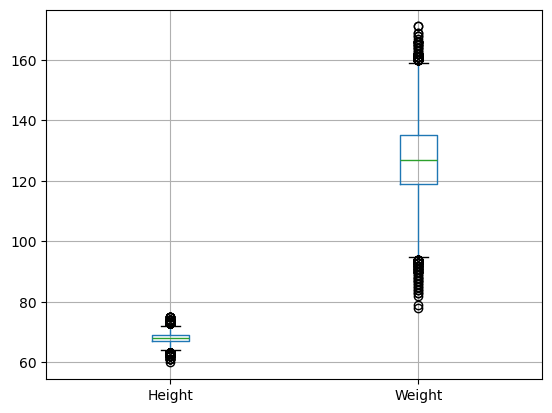

In [10]:
# Checking Outliers
df.boxplot()

In [11]:
## Outlier capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x> upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

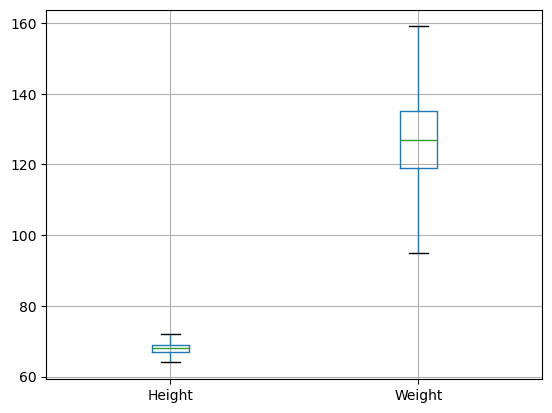

In [12]:
df.boxplot()
plt.show()

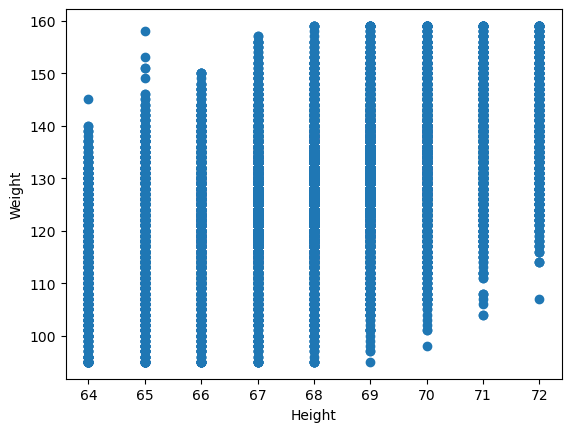

In [13]:
## Scatter plot
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [87]:
## Correlation
df.corr()

,Height,Weight
Height,1.000000,0.494811
Weight,0.494811,1.000000


In [15]:
## Seaborn for Visualization
import seaborn as sns
sns.pairplot(df)

In [16]:
## Independent and Dependent features
x=df['Weight']
print(type(x),x)

<class 'pandas.core.series.Series'> 0        113.0
1        136.0
2        153.0
3        142.0
4        144.0
         ...  
24995    118.0
24996    120.0
24997    118.0
24998    132.0
24999    125.0
Name: Weight, Length: 25000, dtype: float64


In [17]:
# We convert the series type to DataFrame type
# Independent feature should be data frame or 2-dimensional array
X=df[['Weight']]
X

,Weight
0,113.0
1,136.0
2,153.0
3,142.0
4,144.0
...,...
24995,118.0
24996,120.0
24997,118.0
24998,132.0


In [18]:
# series format
X=df['Weight']
np.array(X).shape

(25000,)

In [19]:
X=df[['Weight']]
np.array(X).shape

(25000, 1)

In [20]:
X.head()

,Weight
0,113.0
1,136.0
2,153.0
3,142.0
4,144.0


In [21]:
# Dependent feature should be in series or one dimensional array
y=df['Height']
y

0        66.0
1        72.0
2        69.0
3        68.0
4        68.0
         ... 
24995    70.0
24996    65.0
24997    65.0
24998    68.0
24999    69.0
Name: Height, Length: 25000, dtype: float64

In [22]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
X_train.shape

(18750, 1)

In [24]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.0804002 ],
       [-0.95663513],
       [ 0.51249825],
       ...,
       [-0.52453708],
       [ 0.77175708],
       [-0.35169785]])

In [25]:
X_test=scaler.transform(X_test)
X_test

array([[ 0.59891786],
       [-1.30231357],
       [ 0.77175708],
       ...,
       [ 0.77175708],
       [-1.21589396],
       [-0.00601941]])

In [26]:
# Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [27]:
regression=LinearRegression(n_jobs=-1)

In [28]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [29]:
print("Cofficient or slope:", regression.coef_)
print("Intercept:", regression.intercept_)

Cofficient or slope: [0.92087093]
Intercept: 67.99584


In [30]:
# plot training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

### Predication for test data
#### 1.Presicted height output=intercept+coef_
#### 2.y_pred_test=67.99552+0.94872(X_test)

In [32]:
# Predication for test data
y_pred=regression.predict(X_test)
y_pred

array([68.54736604, 66.7965773 , 68.70652866, ..., 68.70652866,
       66.8761586 , 67.9902969 ])

In [33]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [34]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.673738003173167
1.3150589330837197
1.635156874178489


In [35]:
# R square
# Formula:
# R^2-1-SSR/SST
# R^2=coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [36]:
from sklearn.metrics import r2_score

In [37]:
score=r2_score(y_test,y_pred)
print(score)

0.24882299921677486


In [38]:
# Adjusted R square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.2487027724240759

In [39]:
# OLS Linear Regression
import statsmodels.api as sm

In [40]:
model=sm.OLS(y_train,X_train).fit()

In [41]:
prediction=model.predict(X_test)
print(prediction)

[ 0.55152604 -1.1992627   0.71068866 ...  0.71068866 -1.1196814
 -0.0055431 ]


In [42]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              3.437
Date:                Sun, 11 Jan 2026   Prob (F-statistic):                      0.0638
Time:                        23:14:47   Log-Likelihood:                     -1.0573e+05
No. Observations:               18750   AIC:                                  2.115e+05
Df Residuals:                   18749   BIC:                                  2.115e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [43]:
# Prediction for new data
regression.predict(scaler.transform([[150]]))

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([69.82066695])